In [33]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve
import matplotlib.patches as patches


##################머신러닝 모듈 ################

from sklearn.model_selection import train_test_split #사이킷런 import
from sklearn.linear_model import LinearRegression

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)


In [34]:
#와인 등급 예측하기

file_url = "https://raw.githubusercontent.com/musthave-ML10/data_source/main/customer_pca.csv"

data = pd.read_csv(file_url)

data.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,label
0,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930,0
1,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587,3
2,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891,1
3,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675,0
4,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796,3


In [35]:
customer_X = data.drop('label' , axis = 1) # 독립변수 지정

customer_y = data['label'] # 종속변수 지정

In [36]:
customer_X

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930
1,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587
2,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891
3,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675
4,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.965514,0.426639,0.196184,2.086544,0.727562,0.725503,0.940589,1.923480,1.086851,1.810368,0.252344,-0.401038
96,-0.839991,-0.715988,0.394918,-0.398366,-0.721701,-1.263462,-0.576780,-0.190013,-0.818620,-0.286312,-0.940283,-0.504166
97,-1.107688,-0.926597,-1.190202,-1.342390,-0.850378,-1.073294,-1.011957,-1.616986,-1.182972,-0.974736,-0.664583,0.193335
98,-0.940815,-0.807895,-1.093267,-1.342878,-0.676572,-1.287731,-1.305887,-1.463747,-1.050452,-0.895722,-0.708094,0.954537


In [37]:
customer_y

0     0
1     3
2     1
3     0
4     3
     ..
95    3
96    0
97    0
98    0
99    3
Name: label, Length: 100, dtype: int64

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components= 2) # 주성분 개수 지정

In [40]:
pca.fit(customer_X) # 학습
customer_pca = pca.transform(customer_X) # 변환

In [41]:
customer_pca # 결과 확인

array([[-3.929e+00,  1.026e-01],
       [ 3.108e+00, -1.749e+00],
       [ 3.024e+00,  3.212e+00],
       [-4.282e+00,  1.138e-02],
       [ 2.591e+00, -1.906e+00],
       [ 8.703e-01, -1.792e-02],
       [-1.165e+00,  2.004e+00],
       [ 1.412e+00, -1.212e+00],
       [ 1.793e-01, -1.153e+00],
       [-2.742e+00, -3.481e-02],
       [ 4.031e-01, -2.564e-01],
       [-4.328e+00,  1.093e-01],
       [-1.068e+00, -4.713e-01],
       [-3.542e+00,  2.094e-01],
       [ 3.003e+00,  6.851e-02],
       [ 5.085e+00, -1.922e+00],
       [-1.390e+00,  3.222e-01],
       [-2.643e+00, -4.597e-01],
       [-7.377e-01, -9.304e-01],
       [-3.934e+00,  1.627e-01],
       [ 3.167e-01, -4.223e-01],
       [ 7.319e+00,  5.179e-02],
       [ 6.604e-01, -1.138e+00],
       [-3.961e+00, -5.550e-02],
       [ 2.885e+00, -1.510e+00],
       [-9.134e-01, -2.843e-01],
       [ 7.477e+00,  4.136e-01],
       [ 8.512e-01,  2.665e+00],
       [ 3.117e+00,  3.555e+00],
       [-2.617e+00, -2.274e-03],
       [-1

In [42]:
customer_pca = pd.DataFrame(customer_pca , columns = ['PC1' , 'PC2']) # 데이터프레임으로 변환

In [43]:
customer_pca = customer_pca.join(customer_y) # 데이터 합치기

customer_pca.head()


,PC1,PC2,label
0,-3.929061,0.102604,0
1,3.107583,-1.748879,3
2,3.023793,3.212212,1
3,-4.282418,0.011378,0
4,2.590658,-1.906121,3


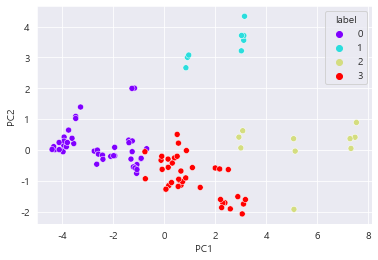

In [44]:
sns.scatterplot(x= 'PC1' , y='PC2' , data = customer_pca , hue = 'label' , palette= 'rainbow') # 산점도 그리기

In [45]:
pca.components_

array([[ 0.348,  0.324,  0.303,  0.142,  0.306,  0.313,  0.297,  0.305,
         0.293,  0.303,  0.321,  0.089],
       [ 0.058,  0.06 ,  0.153, -0.544,  0.031,  0.038,  0.238, -0.232,
        -0.247, -0.209,  0.145,  0.659]])

In [46]:
df_comp = pd.DataFrame(pca.components_, columns = customer_X.columns)
df_comp

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,0.348468,0.324472,0.303037,0.141869,0.306183,0.312973,0.297189,0.304582,0.293413,0.302877,0.320534,0.089275
1,0.058276,0.060343,0.152647,-0.544356,0.031095,0.037906,0.238096,-0.231528,-0.247193,-0.208983,0.144790,0.659468


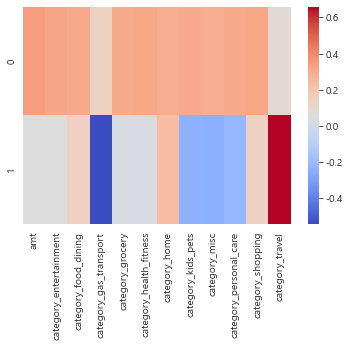

In [47]:
sns.heatmap(df_comp , cmap='coolwarm')

In [48]:
#와인 등급 예측하기

file_url = "https://media.githubusercontent.com/media/musthave-ML10/data_source/main/anonymous.csv"

data = pd.read_csv(file_url)

data.head()

,class,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V4287,V4288,V4289,V4290,V4291,V4292,V4293,V4294,V4295,V4296
0,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.25777,0.12220,0.348620,0.12957,0.43846,-0.108020,0.128330,0.318820,-0.041559,0.22589
1,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.15316,0.14062,-0.030201,0.10134,-0.14546,-0.166650,0.401300,0.035392,0.019906,0.31952
2,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.40122,0.13790,0.138350,0.15746,0.51216,-0.330690,0.070346,0.179250,-0.188740,0.16386
3,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.15587,-0.26686,0.158930,-0.13204,0.32221,-0.042086,0.588970,0.526990,-0.574320,0.20891
4,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,0.24020,0.44605,-0.163560,0.45311,0.59073,0.356800,0.395780,0.035871,-0.293430,0.38124


In [49]:
data['class'].mean() # 종속변수의 평균 확인

0.250

In [50]:
data.isna().sum().sum() # 결측치 확인

# 변수별 결측치 합을 구하고, 거기에 한 번 더 합을 구해서, 데이터프레임 전체에 결측치가 얼마인지 확인

0

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(data.drop('class' , axis =1) , data['class'] , test_size= 0.2 , random_state= 100)

#학습 셋, 시험 셋 분리

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # 스케일러 객체 생성
scaler.fit(X_train)  # 학습

X_train_scaled = scaler.transform(X_train) # 변환
X_test_scaled = scaler.transform(X_test) # 변환

In [53]:
from sklearn.ensemble import RandomForestClassifier
model_1 = RandomForestClassifier(random_state= 100)

In [54]:
import time

start_time = time.time() # 시작시간 설정
model_1.fit(X_train_scaled , y_train) # 학습

print(time.time() - start_time) # 소요시간 출력

83.19833517074585


In [55]:
from sklearn.metrics import accuracy_score,  roc_auc_score

pred_1 = model_1.predict(X_test_scaled)

accuracy_score(y_test , pred_1)

0.958

In [57]:
proba_1 = model_1.predict_proba(X_test_scaled) # 예측 , 소수점 형태로 된 예측값을 사용하기 때문에, predict()가 아닌 predict_proba()를 사용해야 한다.

roc_auc_score(y_test , proba_1[: , 1])

0.9982541957107813

In [58]:
pca = PCA(n_components=2) # 주성분 개수 지정

pca.fit(X_train_scaled) # 학습

PCA(n_components=2)

In [59]:
pca.explained_variance_ratio_ # 데이터 반영 비율 확인 ==> 기존 데이터의 0.08 정도의 정보만 반영한다.

# ==> 정보의 손실이 크다.

array([0.05 , 0.033])

In [60]:
var_ratio = [] # 빈 리스트 생성

for i in range(100, 550 , 50): # 순회
    pca = PCA(n_components= i) # 주성분 개수 지정
    pca.fit_transform(X_train_scaled)
    ratio = pca.explained_variance_ratio_.sum() # 데이터 반영 비율 합
    var_ratio.append(ratio)

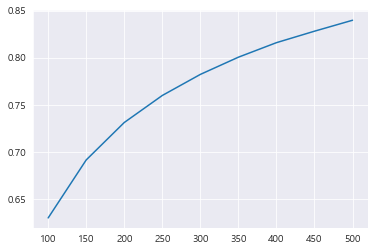

In [62]:
sns.lineplot(x = range(100,550, 50) , y = var_ratio)

In [63]:
pca = PCA(n_components= 400 , random_state= 100) # 주성분 개수 지정
pca.fit(X_train_scaled) # 학습
X_train_scaled_pca=  pca.transform(X_train_scaled) # 변환
X_test_scaled_pca = pca.transform(X_test_scaled) # 변환

In [64]:
model_2 = RandomForestClassifier(random_state= 100)
start_time = time.time()
model_2.fit(X_train_scaled_pca , y_train)
print(time.time() - start_time)

56.191216230392456


In [65]:
pred_2 = model_2.predict(X_test_scaled_pca) # 예측
accuracy_score(y_test , pred_2) # 정확도 확인

0.98925

In [66]:
proba_2 = model_2.predict_proba(X_test_scaled_pca) # 예측
roc_auc_score(y_test , proba_2[:,1])

0.9982517669346417